### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 24th at 11.59pm CDT
---

The first two homework problems this week are very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

#1
y= w1x1+w2x2+b
No, I don't think this model will learn nonlinearities being linear in the individual inputs and in the contributions from the synapses.

After running, this model pretty much splits the data into two sections and can't learn any structure beyond that.

#2
Increasing the number of neurons and switching to a nonlinear activation greatly improved the fit, the model 
correctly predicted the four sections that are present in the data.

#3
This time the model is way more confident in its predictions and gets much closer to the actual shape of the data.

#4 
With one hidden layer containing 3 neurons I and a tanh activation, I can get the test loss below 0.177.

#5
No, the fit isn't really better nor is the convergence really faster just because I made the model larger.

SRT: Good. In the equation in #1, you're missing the weight from the synapse connecting the hidden layer neuron with the output neuron. -1

## Problem 2


[This](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.01&noise=50&networkShape=3,2&seed=0.65406&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature combinations may be hard to construct.

1. Train the best model you can, using just X1 and X2. Add or remove layers and neurons as you see fit, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?


2. Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

#1
Using a tanh activation, increasing the batch size to 12, decreasing the regularization to 0, and using 2 hidden
layers with 3 and 2 neurons respectively, I can get the test loss down to 0.473. The surface isn't very smooth, it has
large striations that don't match the spiral very well. 

#2
Incorporating sin(x1) I do get a slightly better fit, my test loss is down to 0.409. The surface is a lot less blocky
though, which is nice.

SRT: It's definitely possible to get this down to a test loss of ~0.2 or so with 4 hidden layers, 5 neurons in each and RELU activation. Your model may get down to low test losses as well, but the test loss can appear to plateau then suddenly drop ater 1000 or so epochs of training. Further epochs and some more iteration on network architecture were needed here. -3

## Problem 3

The first few steps of this problem are the same as last week's homework.


1. Use the following code snippet to read in SDSS galaxy color data.
```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```
Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [21]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [12]:
#1
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
data = data[::10]
ug= data['u']-data['g']
gr= data['g']-data['r']
ri= data['r']-data['i']
iz= data['i']-data['z']
redshift= data['redshift']
spec= data['specClass']

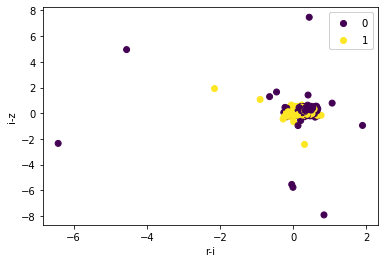

In [14]:
#2
fig, ax = plt.subplots()
specbool=(spec=='QSO')
scatter=ax.scatter(ri,iz,c=specbool,label=spec)
legend1 = ax.legend(*scatter.legend_elements())
ax.add_artist(legend1)
ax.set_xlabel('r-i')
ax.set_ylabel('i-z')
plt.show()

In [17]:
#3
print(len(data))
X= np.empty([5000,2])
X[:,0]=ri
X[:,1]=iz
targets=specbool

Xtrain,Xtest,ytrain,ytest= train_test_split(X,targets, test_size= .2,random_state=42)

5000


In [18]:
#4
#doing what we did in the lecture notebook to normalize the data
X_mean = Xtrain.mean(axis=0, keepdims=True)
X_std = Xtrain.std(axis=0, keepdims=True) + 1e-7
Xtrain = (Xtrain - X_mean) / X_std
Xtest = (Xtest - X_mean) / X_std


SRT: This should do the same thing, but note that you can just use `preprocessing.scale()` on the data.

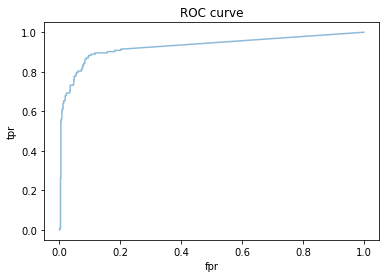

In [24]:
#5
clf= MLPClassifier(solver='sgd',hidden_layer_sizes=(5,2),max_iter=1000,random_state=42)
clf.fit(Xtrain, ytrain)
y_prob = clf.predict_proba(Xtest)[:,1]
fpr, tpr, thresh = roc_curve(ytest, y_prob) 
plt.plot(fpr, tpr,alpha=0.5)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [25]:
#6
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

grid = GridSearchCV(MLPClassifier(),parameters) 
grid.fit(Xtrain,ytrain)
print(grid.best_params_)


/Users/keshawnivory/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/keshawnivory/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/keshawnivory/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lb

{'activation': 'tanh', 'hidden_layer_sizes': (2, 2), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}


In [29]:
print('Best score = '+str(grid.best_score_))

Best score = 0.933


SRT: Very good.

Best score = 0.933


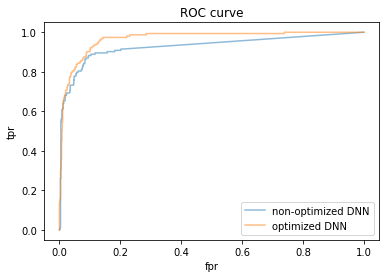

In [28]:
#7
clf1= MLPClassifier(solver='sgd',hidden_layer_sizes=(5,2),max_iter=1000,random_state=42)
clf1.fit(Xtrain, ytrain)
y_prob1 = clf1.predict_proba(Xtest)[:,1]
fpr1, tpr1, thresh1 = roc_curve(ytest, y_prob1) 
plt.plot(fpr1, tpr1,alpha=0.5,label= 'non-optimized DNN')
clf2= MLPClassifier(activation='tanh',solver='lbfgs',hidden_layer_sizes=(2,2),max_iter=1000,random_state=42)
clf2.fit(Xtrain, ytrain)
y_prob2 = clf2.predict_proba(Xtest)[:,1]
fpr2, tpr2, thresh2 = roc_curve(ytest, y_prob2) 
plt.plot(fpr2, tpr2,alpha=0.5,label = 'optimized DNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.legend()
plt.show()

SRT: I don't understand why there is a mismatch between what your network optimization returned and what you used to train your final network. Your optimization wanted the lbfgs solver with (2,2) hidden layers, but you coded the final network with sgd and (5,2). You get the same high score, so no big penalty for this. -1